# MIR-ST500 Dataset

MIR-ST500 is a comprehensive dataset specifically tailored for the task of Automatic Singing Transcription, where the vocal component is translated into sheet music.

In [1]:
import os

PROJECT_DIR = os.getcwd()
DATASET_DIR = os.path.join(PROJECT_DIR, "dataset")
LABELS_JSON_FILE= os.path.join(DATASET_DIR, "labeled.json")
print("Project directory: ", PROJECT_DIR)
print("Dataset directory: ", DATASET_DIR)
print("Labels file: ", LABELS_JSON_FILE)

Project directory:  /workspaces/Singing-Voice-Transcription
Dataset directory:  /workspaces/Singing-Voice-Transcription/dataset
Labels file:  /workspaces/Singing-Voice-Transcription/dataset/labeled.json


In [2]:
from get_youtube import get_audios
from do_spleeter import get_vocals
from labeled_midi import get_midis

# Get audio from youtube
get_audios()
# Get vocals from audio
get_vocals()
# Get midi from labeled vocals
get_midis()

2023-11-21 16:38:01.743189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-21 16:38:01.743224: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


100%|██████████| 400/400 [00:03<00:00, 105.01it/s]


Failed to download 41 songs, 359 songs downloaded
Download failed for idx 38: https://www.youtube.com/watch?v=ZyWJGW_tqmg
Download failed for idx 48: https://www.youtube.com/watch?v=dEtfwmZOD2A
Download failed for idx 50: https://www.youtube.com/watch?v=L1j8jsHn0UE
Download failed for idx 55: https://www.youtube.com/watch?v=ssqZsiMDq9o
Download failed for idx 60: https://www.youtube.com/watch?v=Tas1h6rqHDE
Download failed for idx 70: https://www.youtube.com/watch?v=z95nTGbkhOk
Download failed for idx 81: https://www.youtube.com/watch?v=zeniKeWWh4o
Download failed for idx 114: https://www.youtube.com/watch?v=IlsVP47f32k
Download failed for idx 126: https://www.youtube.com/watch?v=oY_rjWZoRDA
Download failed for idx 127: https://www.youtube.com/watch?v=UF8JU0H0rpQ
Download failed for idx 129: https://www.youtube.com/watch?v=NrHRTNeni-U
Download failed for idx 141: https://www.youtube.com/watch?v=dqkGyGgx-vM
Download failed for idx 150: https://www.youtube.com/watch?v=nx5xDM7q-so
Download

100%|██████████| 100/100 [00:00<00:00, 10478.69it/s]


Failed to download 2 songs, 98 songs downloaded
Download failed for idx 402: https://www.youtube.com/watch?v=-1tyb01k9nI
Download failed for idx 445: https://www.youtube.com/watch?v=Sxmj-oNBVk0
Cleaning up


100%|██████████| 500/500 [00:00<00:00, 52786.43it/s]


Done, 457 songs spleeted in total


100%|██████████| 500/500 [00:00<00:00, 1298.26it/s]

Done, 457 songs midi generated in total


In [3]:
from baseline import AudioDataset
from utils import save_pkl

print("Generating dataset in pkl file...")

target_path = os.path.join(DATASET_DIR, "train", "train.pkl")
if not os.path.exists(target_path):
    dataset = AudioDataset(gt_path=LABELS_JSON_FILE, data_dir=os.path.join(DATASET_DIR, "train"))
    save_pkl(target_path, dataset)

Generating dataset in pkl file...
computing CQT......
creating dataset......


 63%|██████▎   | 227/359 [01:54<01:02,  2.13it/s]

: 

In [3]:
def get_vocals_filepath(idx):
    train = os.path.join(DATASET_DIR, "train", str(idx), "Vocals.wav")
    valid = os.path.join(DATASET_DIR, "valid", str(idx), "Vocals.wav")
    dirname = None
    if os.path.exists(train):
        dirname = "train"
    if os.path.exists(valid):
        dirname = "valid"
    return str(os.path.join(DATASET_DIR, dirname, str(idx), "Vocals.wav"))

def get_midi_filepath(idx):
    train = os.path.join(DATASET_DIR, "train", str(idx), "Vocals.wav")
    valid = os.path.join(DATASET_DIR, "valid", str(idx), "Vocals.wav")
    dirname = None
    if os.path.exists(train):
        dirname = "train"
    if os.path.exists(valid):
        dirname = "valid"
    return str(os.path.join(DATASET_DIR, dirname, str(idx), "Vocals.mid"))

In [4]:
vocals_fp = get_vocals_filepath(1)
midi_fp = get_midi_filepath(1)

print("Vocals: ", vocals_fp)
print("Midi: ", midi_fp)

Vocals:  /workspaces/Singing-Voice-Transcription/dataset/train/1/Vocals.wav
Midi:  /workspaces/Singing-Voice-Transcription/dataset/train/1/Vocals.mid


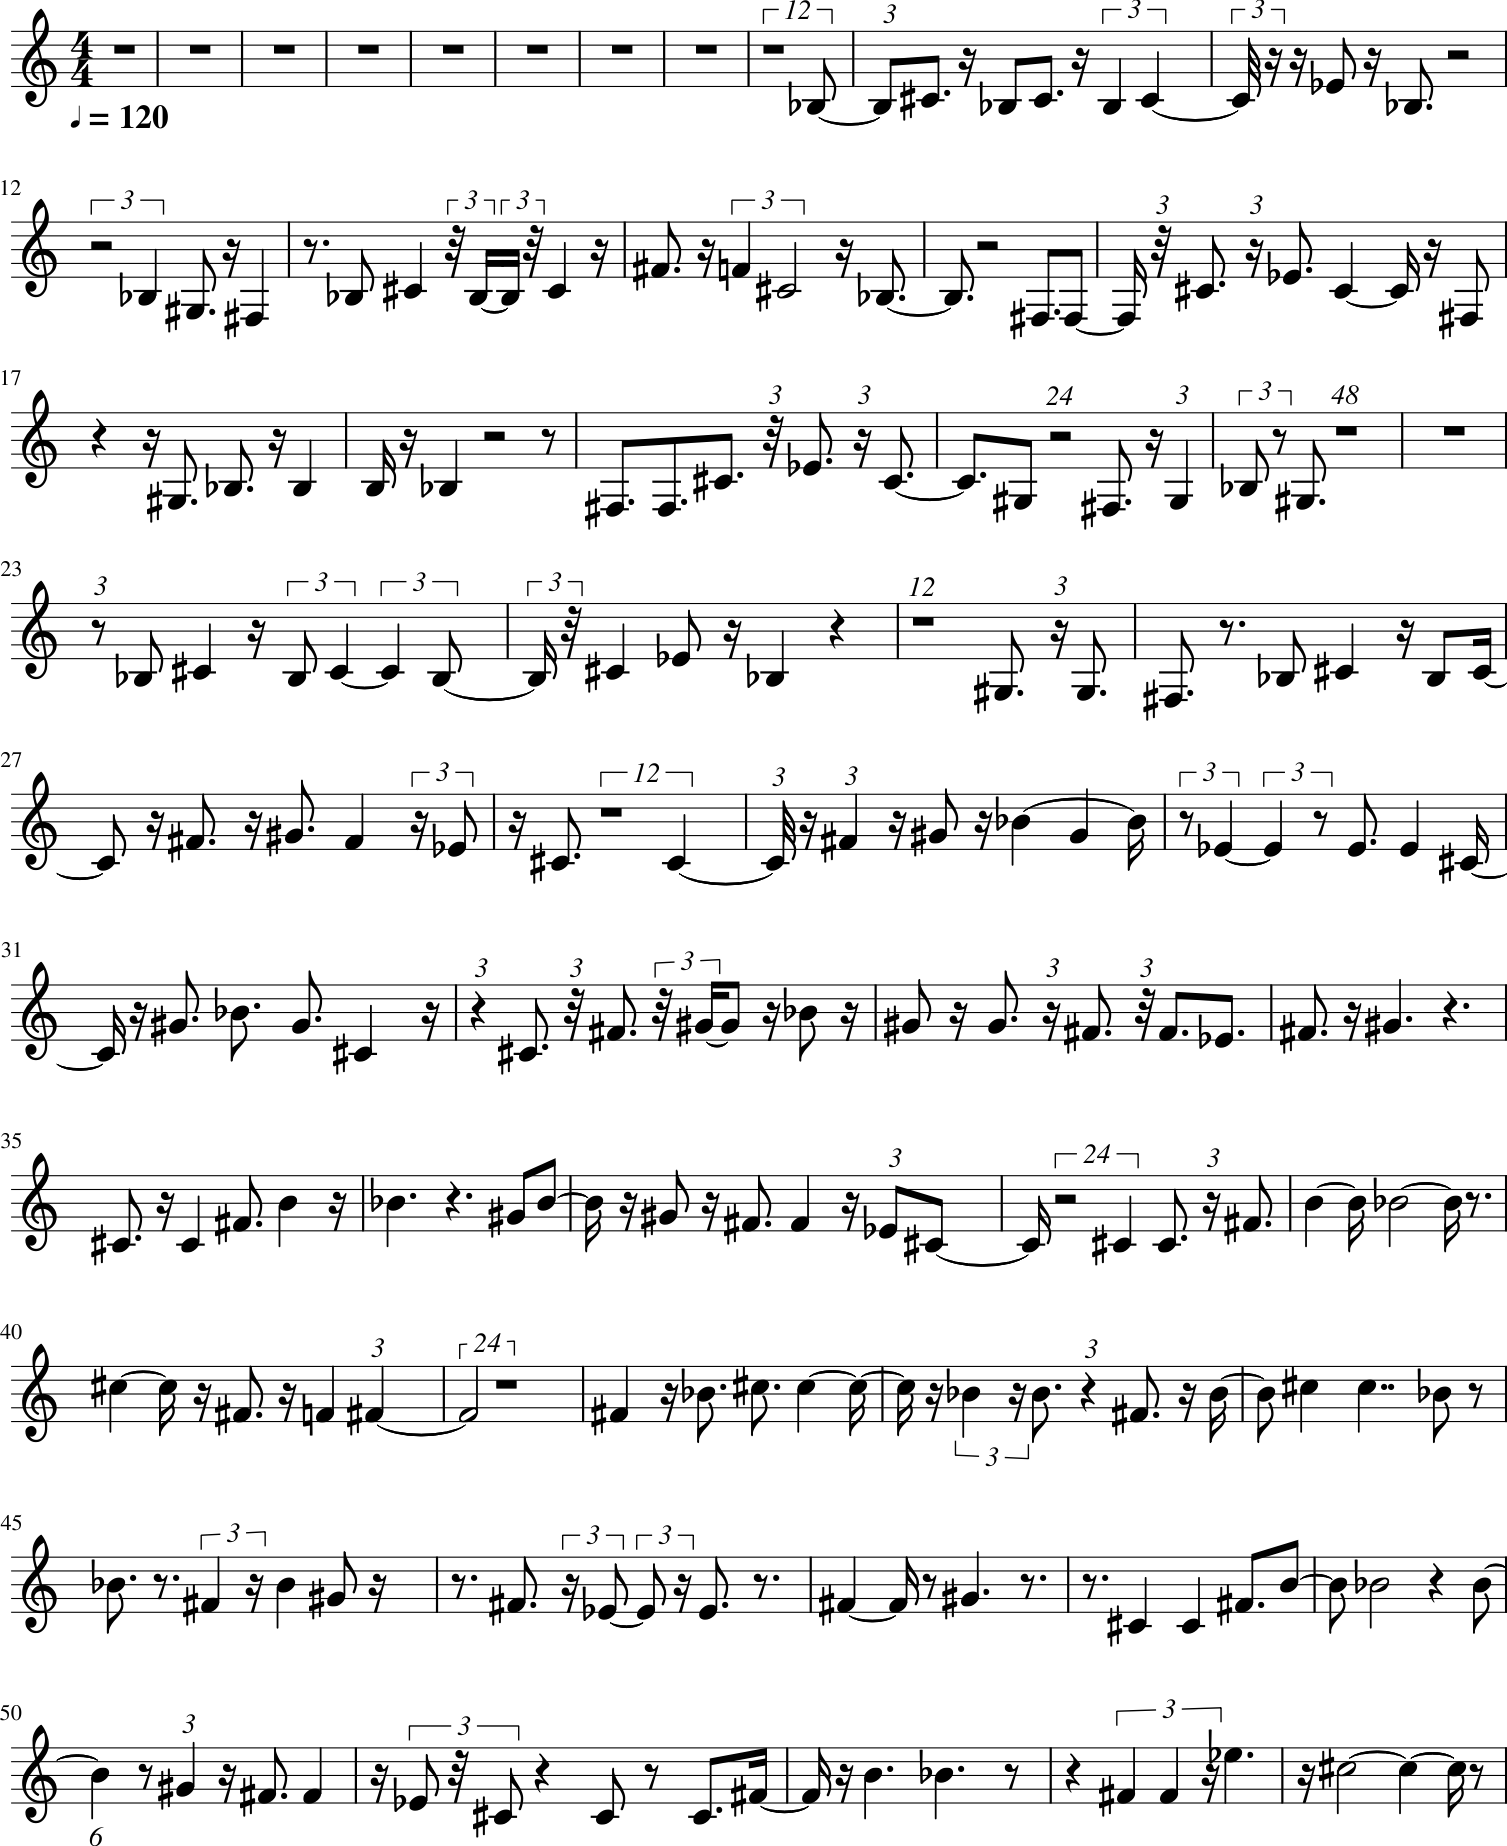

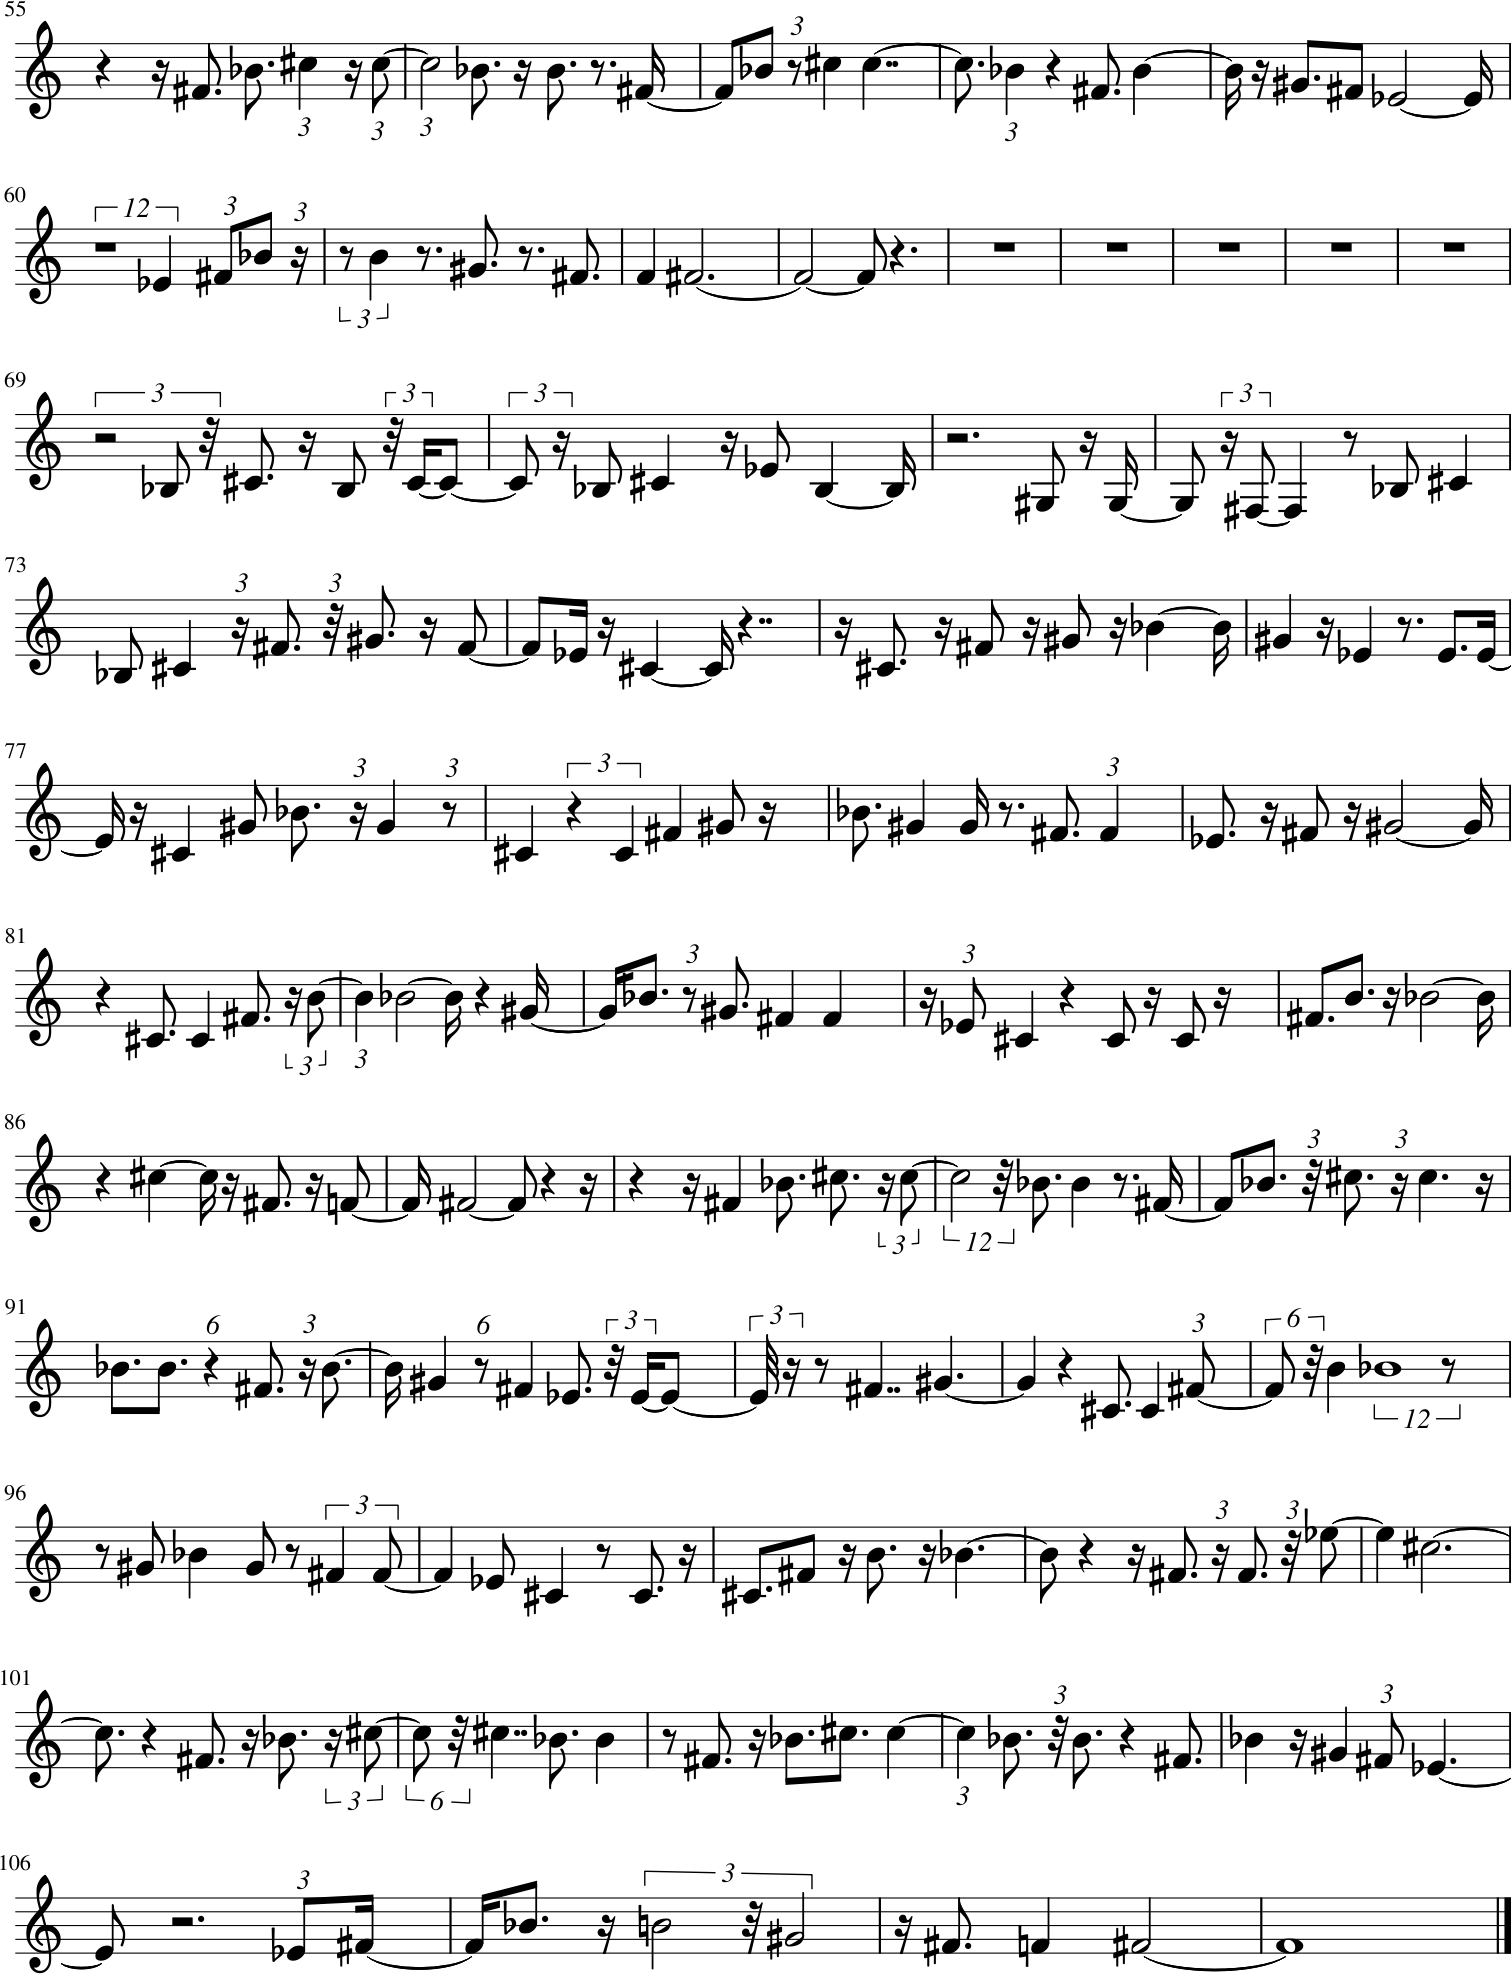

In [5]:
from music21 import midi

mf = midi.MidiFile()
mf.open(midi_fp)
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)
s.show()